# EDA on Bike Rental Dataset in Washington D.C.
## Archit Gupta
## 135001620

## 1. Introduction


Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. Data is aggregated on daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

Link to Dataset: https://www.kaggle.com/datasets/harbhajansingh21/bike-sharing-dataset?select=day.csv						

#### Goal of the Project:

The goal of the project is to make the predictions of number of bike rentals based on various seasonal impacts and weather conditions. The motivation of the set goal is to give the business insights on what can they expect with the number of bike rentals for the following week so that they can better optimize their resources. For this problem, hypotheses would have to be tested and upon comparision of various hypotheses and models, the best results would be published.

#### Objective of the Project:

The objective of the research is to design 3 hypotheses and apply multiple regression models on the data based on the hypothesis. Then the various results would be comparied using mean squared error to choose the best proforming regression model among the ones used. Also, the results of the varous hypotheses would be compared to choose the best performing set of data attributes along with the model. Also, before fiting the model on the data, data preprocessing would be done to check for any null values in the data and drop the columns that are not required for regression. Also, to design hypotheses, Exploratory Data Analysis would be performed on the data to better understand its features.



## Data Description

The data has been collected and combined from various sources, like, the bike rental data has been collected from the publicly available dataset present at Capital Bikeshare system's website (http://capitalbikeshare.com/system-data), and the weather data is extracted from http://www.freemeteo.com/.

**Columns Details**

- instant: index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Variable Type**

| **List of Variables** | **Type of Variable**            |
|-----------------------|---------------------------------|
| dteday                | Nominal Categorical Variable    |
| season                | Nominal Categorical Variable    |
| yr                    | Nominal Categorical Variable    |
| mnth                  | Nominal Categorical Variable    |
| holiday               | Nominal Categorical Variable    |
| weekday               | Nominal Categorical Variable    |
| workingday            | Nominal Categorical Variable    |
| weathersit            | Nominal Categorical Variable    |
| temp                  | Continuous Quantitative Variable|
| atemp                 | Continuous Quantitative Variable|
| hum                   | Continuous Quantitative Variable|
| windspeed             | Continuous Quantitative Variable|
| casual                | Discrete Quantitative Variable  |
| registered            | Discrete Quantitative Variable  |
| cnt                   | Discrete Quantitative Variable  |


In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score




## Data Preprocessing

In [2]:
# Importing dataset

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# 1. Check data dimension by using .shape

print("Shape of the data: ",df.shape)

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Shape of the data:  (731, 16)
Rows   : 731
Columns: 16


In [4]:
# 2. Check types of data by .info() ; .dtype

print("Type of data:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Type of data:
 None


In [5]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data 

print(df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].describe())

             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000  


In [6]:
# droping the instant as it is just an id for the record

df.drop('instant',axis=1,inplace=True) #delete instant since it's just an id
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Check if there are duplicated values

df[df.duplicated]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There are no duplicate records in the dataset

In [8]:
# Removing the date column as date wouldn't help in applying the regression model
df = df.drop("dteday", axis = 1)

In [9]:
# 3. check if there are missing values

df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [10]:
print(df['season'].unique())
print(df['holiday'].unique())
print(df['weekday'].unique())
print(df['workingday'].unique())
print(df['weathersit'].unique())

[1 2 3 4]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


In [11]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


## EDA

**Cheking the Distribution of the Data for the following columns:**

- Count
- Temperature
- Wind Speed
- Humidity

array([[<Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

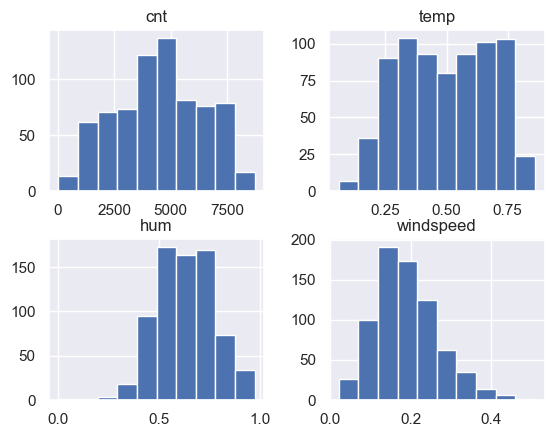

In [12]:
# Distribution of the columns
# Ploting histogram

sns.set(style="darkgrid") # setting the style of grid
df_dist = df[['cnt', 'temp', 'hum', 'windspeed']]
df_dist.hist()

We can see the data is largely normally distributed, except for the temperature column. Normal distribution is necessary for analysis to be done on the data.

**Correlation Heat Map**

This heatmap would help us tell the correlation between various variables of our dataset. This is usefull in knowing which variables are heavily dependent on which variables, further helping in getting insights from the data.

<Axes: >

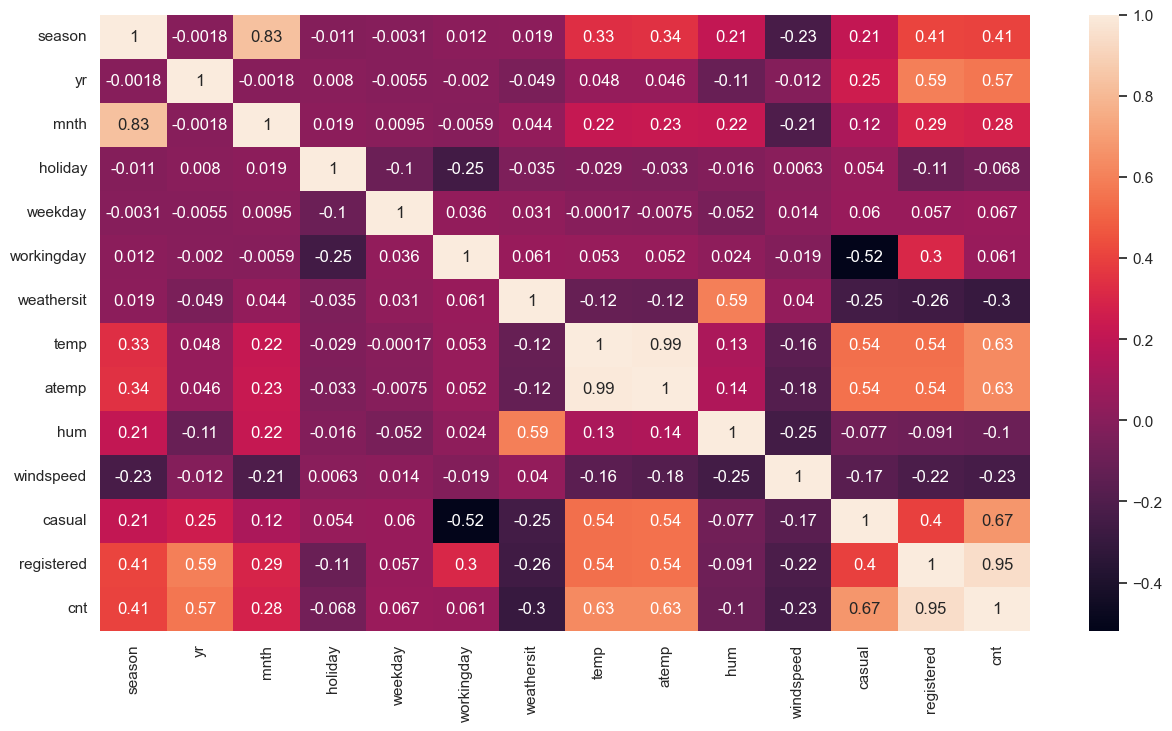

In [13]:
# ploting the heatmap for all the variables of the dataset

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

Here, a number closer to 1 indicates higher correlation and a negative number would indicate inverse correlation.

Using this heatmap, we can clearly see that count of the number of bikes rented is most correlated to variables such as temp (temperature) and atemp (actual temperature) with a correlation value of 0.63.

So we can infer with this that as the temperature rises, more people prefer to rent a cycle.

Also, we can see that count is negatively correlated to windspeed with a correlation of -0.23. Negative correlation between windspeed and count indicates that they are inversely correlated. This could infer that as the wind speed increases, people prefer not to cycle and use other means of transport.

Note: Though the correlation of 0.95 with variable registered and 0.67 with the variable casual is higher than the correlation of 0.62 with temp, but varialbes like registered and casual tell about the type of user and not the environmental and seasonal conditions. So they are not taken into consideration here.

Similarly, weathersit has least correlation with count (-0.3) but it is a categorical variable so it is not taken into consideration here.

**Important point to notice is that the column registered and cnt have a correlation value of 0.95, so this column would have to be removed from the training data so that model doesn't give results due to the strong correlation of registered column**

Text(0, 0.5, 'Number of rented bikes')

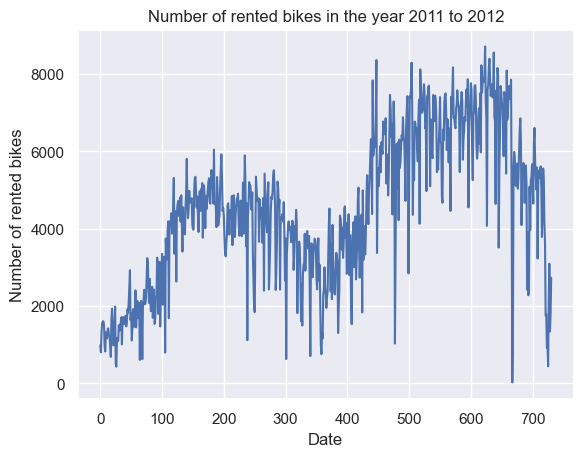

In [14]:
# Ploting a lineplot to visualize the complete data based on the time period and the count of the rentals

sns.lineplot(df.cnt) # ploting the line plot
plt.title('Number of rented bikes in the year 2011 to 2012') # title of plot
plt.xlabel('Date') # label of x-axis
plt.ylabel('Number of rented bikes') # label of y-axis

This plot lays out the complete time period of the dataset vs the bikes rented per day. We can see 2 peaks in the graph, that is the period of 'June' to 'September' of the year 2011 and 2012 as we saw in the year on year trend chart.

**To find how temperature and actual felt temperature are different from each other**

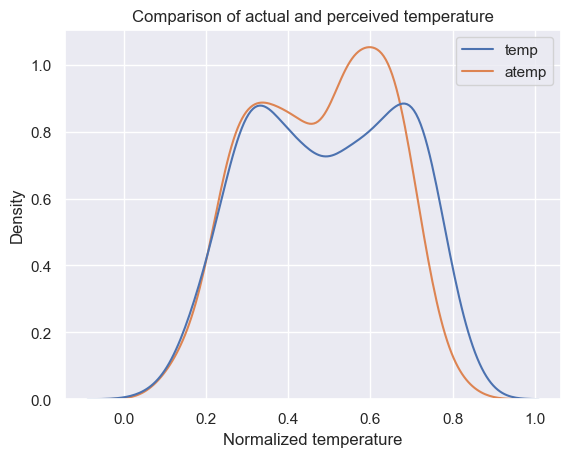

In [15]:
# Plot to compare if temperature and actual felt temperature actually varies from each other or not

sns.kdeplot(data=df[['temp','atemp']]) # plot to compare temp and atemp
plt.xlabel('Normalized temperature') # x-axis label
plt.title('Comparison of actual and perceived temperature') # title of plot
plt.show()

This graph was ploted to check if there was a need for different variables for temperature and actual felt temperature. But we can see that the lines do not perfectly align so it's better to keep both the variables for the analysis of the data.

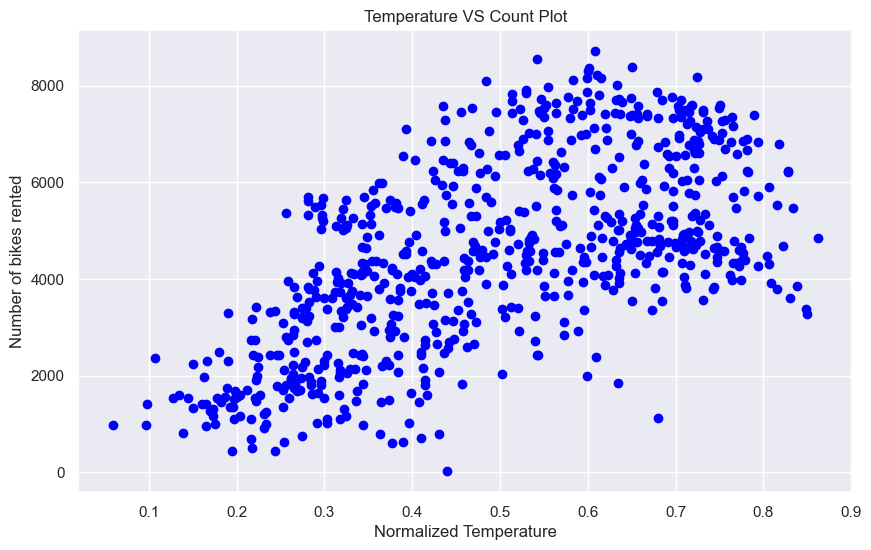

In [16]:
# plotting the scatter plot

plt.figure(figsize=(10,6)) # set the figure size
plt.scatter(df['temp'], df['cnt'], c ="blue") # plot the scatter plot with temp on x-axis, cnt on y-axis and blue color
plt.xlabel("Normalized Temperature") # set the label of x-axis
plt.ylabel("Number of bikes rented") # Set the label of y-axis
plt.title('Temperature VS Count Plot') # set the title of plot
plt.show() # show the plot

From the scatter plot, though not very apparent but we can make out that generally, with the rise in temperature, increase in number of bike rentals do observe an increase a bit.

## Data Preprocessing Continued

Creating a dataframe y for the count column and droping it from the feature set X

In [17]:
from sklearn import preprocessing

y = df[['cnt']]

# Removing the count column from features
X = df.drop("cnt", axis = 1)

# Removing the registered column due to high collinearity with count column
X = X.drop("registered", axis = 1)

# Removing the casual column due to irrelvence in the hypotheses
X = X.drop("casual", axis = 1)

Normalization of the Data using min_max_scaler

In [18]:
y = y.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
y = pd.DataFrame(y_scaled)


## 3. Methodology

First we design 3 hypotheses for the dataset. We understand that the count of bike rentals is dependent mainly upon weather data, seasonal data and whether holiday or not. So, I came up with these 3 hypotheses:

#### Hypothesis 1: Weather Conditions Influence

- Hypothesis: Weather conditions affect bike rentals, with clear or partly cloudy days encouraging more rentals compared to rainy or snowy days. So, including the columns such as weathersit, temp, atemp, hum along with season column could produce good results when fit into the regression model. Also, we have observed during EDA that indeed the increase in temperature contemplates to increased bike rentals.

- Expected Impact: Weathersit (weather conditions) will significantly influence bike rentals, with higher rentals expected on clear, few cloudy, or partly cloudy days compared to misty, rainy, or snowy days.

#### Hypothesis 2: Weekday/Weekend and Holidays

- Hypothesis: Bike rental patterns differ based on weekdays, weekends, and holidays. Along with the seasonal data and month data, including data like month, holiday, weekday and workingday can also produce some good results on performance when it comes to regression modeling. The intuition here is that number of bike rentals can change based on if it's a working day or not depending upon if people use bike rentals for comuting to work or for other activities.

- Expected Impact: Variables like weekday, workingday, and holiday will show a statistically significant impact on bike rentals. Higher rentals may occur on working days compared to weekends, and holidays might exhibit distinct rental patterns compared to regular weekdays.

#### Hypothesis 3: Including all the data (Seasonal, Holiday and Weather Conditions)

- Hypothesis: Now that we have established the various factors that could effect the bike renting patterns, we have to consider that taking all the factors together could also produce good performance results on our regression upon the data. Though the correlation among the holiday and weather condition variables is not strong, we might find some interesting patterns in the analysis.

- Expected Impact: Due to low correlation among the wheather condition variables and holiday or weekend/weekday variables, it's hard to predict how all these factors together would impact our regression modeling but there potentially would be some interesting patterns that could imporve our regression modeling.

#### Regression Models:

Considering the nature of the dataset and the goal of predicting bike rentals, I'd use the following two regression models:

- Multiple Linear Regression
- Ridge Regression

I would use both the models for each hypothesis and compare the models within a hypothesis before comparing the results from different hypothesis. This would not only give us the best model working on our dataset, but also give the best hypothesis.

**Reasons for choosing the above mention models:**

**1. Multiple Linear Regression:**

Why: Multiple Linear Regression is a fundamental choice when dealing with multiple predictors/features, as in this case with various weather, seasonal, and other variables. It allows us to assess the relationship between multiple independent variables and the target variable (bike rentals). It's interpretable and provides insights into the impact of each variable on the outcome.

**2. Ridge Regression:**

Why: Ridge Regression is useful when dealing with multicollinearity (high correlation among predictors), which might exist among weather-related variables like temperature, humidity, and windspeed. It helps mitigate multicollinearity and prevents overfitting by adding a penalty term to the regression coefficients. This can improve the model's generalization performance, especially when dealing with correlated predictors.

These two models offer different advantages in handling multiple predictors and potential issues like multicollinearity. Multiple Linear Regression helps in understanding the relationships between predictors and the target variable, while Ridge Regression addresses multicollinearity concerns, which could be prevalent in weather-related features.

Considering the complexity and nature of the dataset, these models offer a balanced approach by providing interpretability (Multiple Linear Regression) and regularization to handle multicollinearity (Ridge Regression).


## Hypothesis 1

 **Weather Conditions Influence**

Preparing data with the following columns for 1st Hypothesis with the following columns:

- season
- yr
- weathersit
- temp
- atemp
- hum
- windspeed

Creating dataset with the required attributes for this hypothesis:

In [19]:
h1_X = df[['season', 'yr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
print(h1_X.head())

   season  yr  weathersit      temp     atemp       hum  windspeed
0       1   0           2  0.344167  0.363625  0.805833   0.160446
1       1   0           2  0.363478  0.353739  0.696087   0.248539
2       1   0           1  0.196364  0.189405  0.437273   0.248309
3       1   0           1  0.200000  0.212122  0.590435   0.160296
4       1   0           1  0.226957  0.229270  0.436957   0.186900


Normalizing the data using Min-Max Scalar

In [20]:
# Splitting the dataset into train(60%) and test(40%) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,
                                                    random_state=77)

In [21]:
h1_x = h1_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
h1_x_scaled = min_max_scaler.fit_transform(h1_x)
h1_X = pd.DataFrame(h1_x_scaled)

In [22]:
print(h1_X.describe())

                0           1           2           3           4           5  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.498860    0.500684    0.197674    0.543594    0.518864    0.645649   
std      0.370269    0.500342    0.272447    0.228091    0.213909    0.146457   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.000000    0.000000    0.346343    0.339674    0.534704   
50%      0.666667    1.000000    0.000000    0.547268    0.535113    0.644388   
75%      0.666667    1.000000    0.500000    0.743002    0.695083    0.750857   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6  
count  731.000000  
mean     0.346536  
std      0.159766  
min      0.000000  
25%      0.232045  
50%      0.326928  
75%      0.434622  
max      1.000000  


Train Test Splitting

In [23]:
# Splitting the dataset into train(70%) and test(30%) 
h1_X_train, h1_X_test, y_train, y_test = train_test_split(h1_X,y,test_size=0.3,
                                                    random_state=42)

### Model Training and Evaluation

#### Multiple Linear Regression

In [24]:
# Create a Linear Regression object
h1_lr = LinearRegression()

In [25]:
# Fit the model on training data
h1_lr.fit(h1_X_train,y_train)

LinearRegression()

Predicted values are  [[0.71188349]
 [0.1431253 ]
 [0.31749061]
 [0.52357757]
 [0.777141  ]]
y_test              0
703  0.757478
33   0.175794
300  0.428555
456  0.692476
633  0.864703


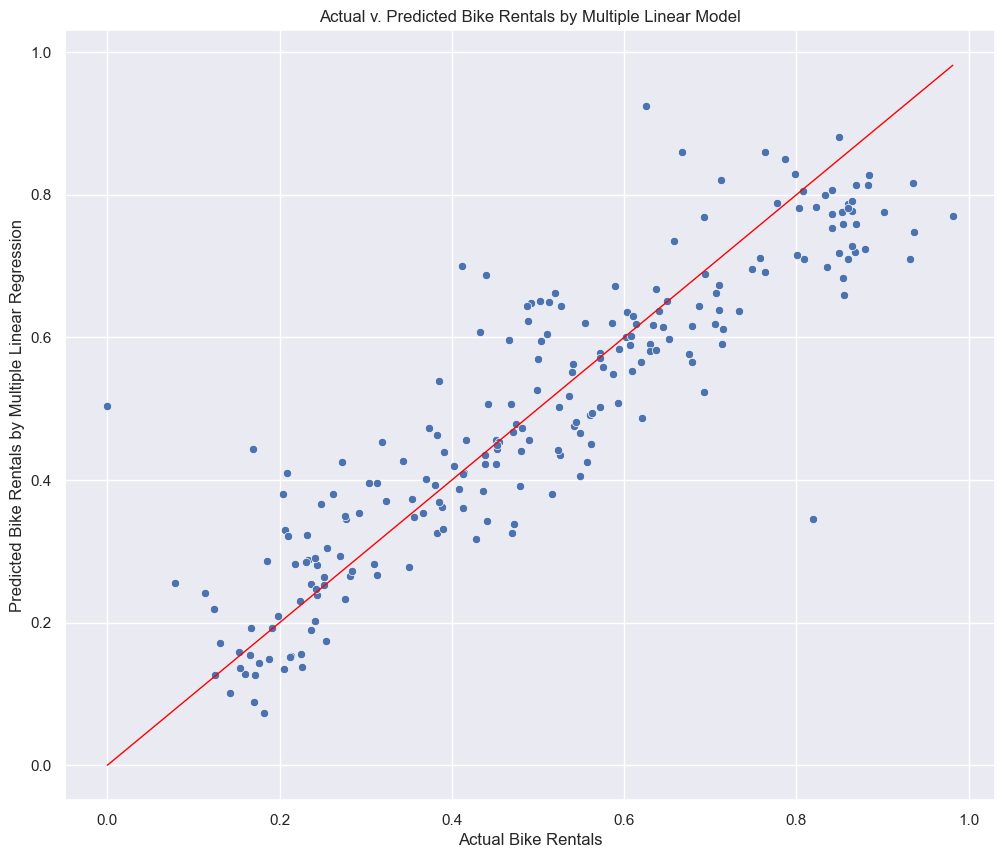

In [26]:
# Predicting target variable on testing data
h1_y_pred = h1_lr.predict(h1_X_test)

print('Predicted values are ', h1_y_pred[0:5])    # First Five Values of Predicted values
print('y_test ', y_test[0:5])

y_test = y_test.values.ravel()
h1_y_pred = h1_y_pred.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h1_y_pred)
plt.title('Actual v. Predicted Bike Rentals by Multiple Linear Model')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by Multiple Linear Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()


In [27]:
h1_mse = mean_squared_error(y_test, h1_y_pred)

print("Mean Squared Error: ", h1_mse)

Mean Squared Error:  0.01057304582101998


In [28]:
h1_r2_score = h1_lr.score(h1_X_test,y_test)

print("R-squared Score: ", h1_r2_score)

R-squared Score:  0.7992436398150639


#### Ridge

In [29]:
from sklearn.linear_model import Ridge

# create a ridge regression instance
h1_ridge = Ridge(alpha=1)

# fit data
h1_ridge.fit(h1_X_train,y_train)

# get predictions
h1_y_pred_ridge=h1_ridge.predict(h1_X_test)

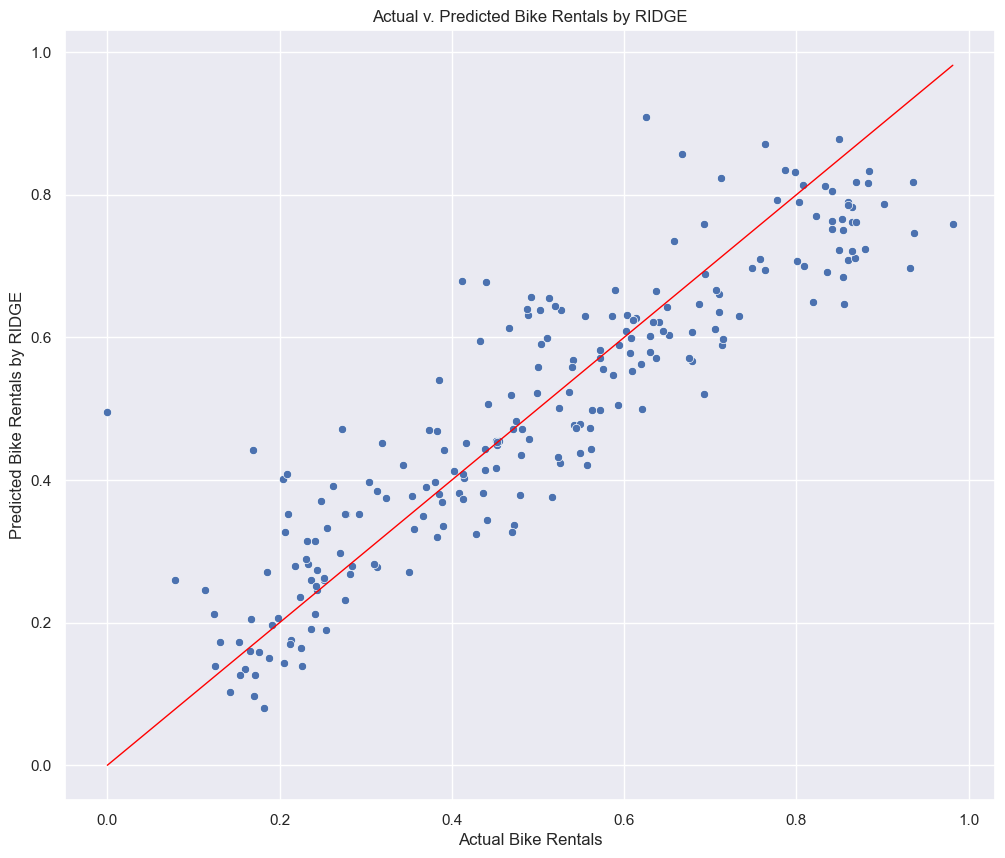

In [30]:
y_test = y_test.ravel()
h1_y_pred_ridge = h1_y_pred_ridge.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h1_y_pred_ridge)
plt.title('Actual v. Predicted Bike Rentals by RIDGE')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by RIDGE')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()

In [31]:
# Mean Squared Error
h1_ridge_mse = mean_squared_error(y_test,h1_y_pred_ridge)
print('Mean Squared Error:', h1_ridge_mse)

Mean Squared Error: 0.009792179054642134


In [32]:
h1_ridge_r2_score = h1_ridge.score(h1_X_test,y_test)
print("R-squared Score: ", h1_r2_score)

R-squared Score:  0.7992436398150639


**Model Comparision**

We can compare the performance of the Multiple Linear Regression and Ridge Regression models using R-squared evaluation metric. For multiple linear regression, the R-squared score is 0.79924 and the R-squared score of ridge regression is 0.81407.

It is very clear that for this hypothesis, given by R-squared metric, Ridge Regression is marginally better than Multiple Linear Regression, so we'll use Ridge Regression Model for comparision of the hypotheses.

This result could be acertained to the fact that there is corelation among the variables and ridge regression performs better when there are some trends in the attributes, and multiple lineear regression in that case doesn't perform as good as ridge regression.

## Hypothesis 2

 **Weekday/Weekend and Holiday Influence**

Preparing data with the following columns for 2nd Hypothesis with the following columns:

- season
- yr
- mnth
- holiday
- weekday
- workingday

Creating dataset with the required attributes for this hypothesis:

In [33]:
h2_X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']]
print(h2_X.head())

   season  yr  mnth  holiday  weekday  workingday
0       1   0     1        0        6           0
1       1   0     1        0        0           0
2       1   0     1        0        1           1
3       1   0     1        0        2           1
4       1   0     1        0        3           1


Normalizing the data using Min-Max Scalar

In [34]:
h2_x = h2_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
h2_x_scaled = min_max_scaler.fit_transform(h2_x)
h2_X = pd.DataFrame(h2_x_scaled)

Train Test Splitting

In [35]:
# Splitting the dataset into train(70%) and test(30%) 
h2_X_train, h2_X_test, y_train, y_test = train_test_split(h2_X,y,test_size=0.3,
                                                    random_state=53)

### Model Training and Evaluation

#### Multiple Linear Regression

In [36]:
# Create a Linear Regression object
h2_lr = LinearRegression()

In [37]:
# Fit the model on training data
h2_lr.fit(h2_X_train,y_train)

LinearRegression()

Predicted values are  [[0.61761687]
 [0.76197008]
 [0.74384245]
 [0.7656757 ]
 [0.45105339]]
y_test              0
450  0.636908
718  0.603428
702  0.714680
689  0.645651
182  0.586401


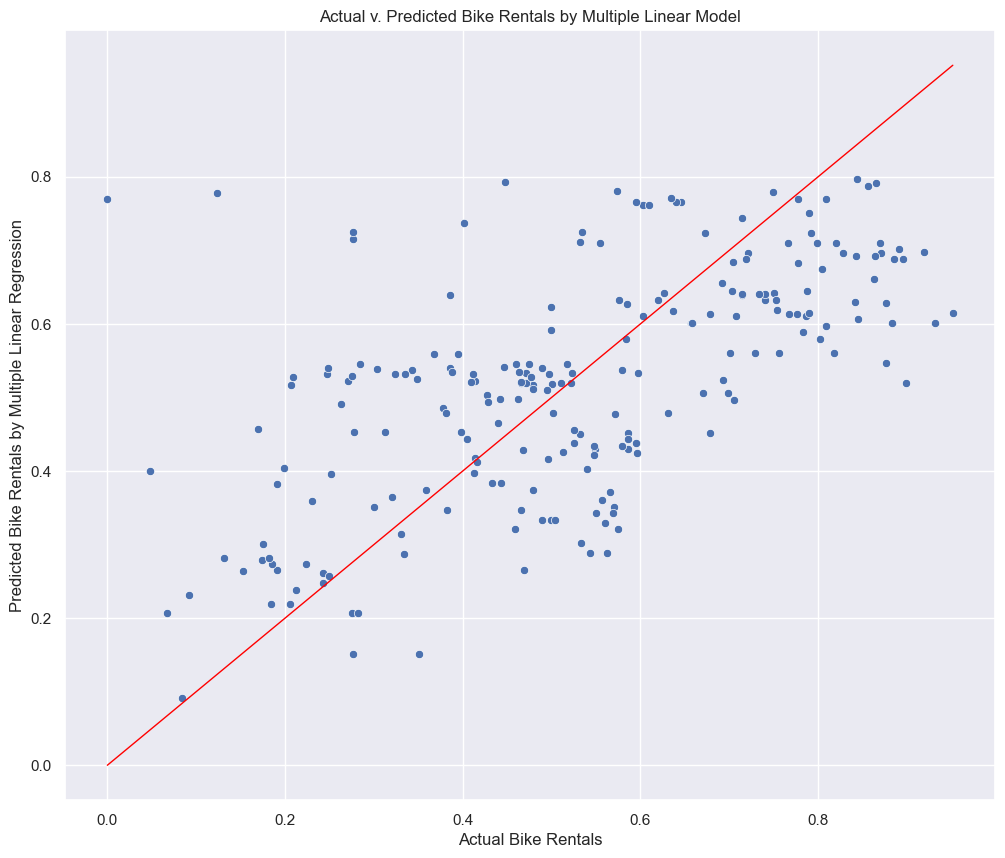

In [38]:
# Predicting target variable on testing data
h2_y_pred = h2_lr.predict(h2_X_test)

print('Predicted values are ', h2_y_pred[0:5])    # First Five Values of Predicted values
print('y_test ', y_test[0:5])

y_test = y_test.values.ravel()
h2_y_pred = h2_y_pred.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h2_y_pred)
plt.title('Actual v. Predicted Bike Rentals by Multiple Linear Model')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by Multiple Linear Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()


In [39]:
h2_mse = mean_squared_error(y_test, h2_y_pred)

print("Mean Squared Error: ", h2_mse)

Mean Squared Error:  0.029342332558036456


In [40]:
h2_r2_score = h2_lr.score(h2_X_test,y_test)

print("R-squared Score: ", h2_r2_score)

R-squared Score:  0.36693320824511255


#### Ridge

In [41]:
from sklearn.linear_model import Ridge

# create a ridge regression instance
h2_ridge = Ridge(alpha=1)

# fit data
h2_ridge.fit(h2_X_train,y_train)

# get predictions
h2_y_pred_ridge=h2_ridge.predict(h2_X_test)

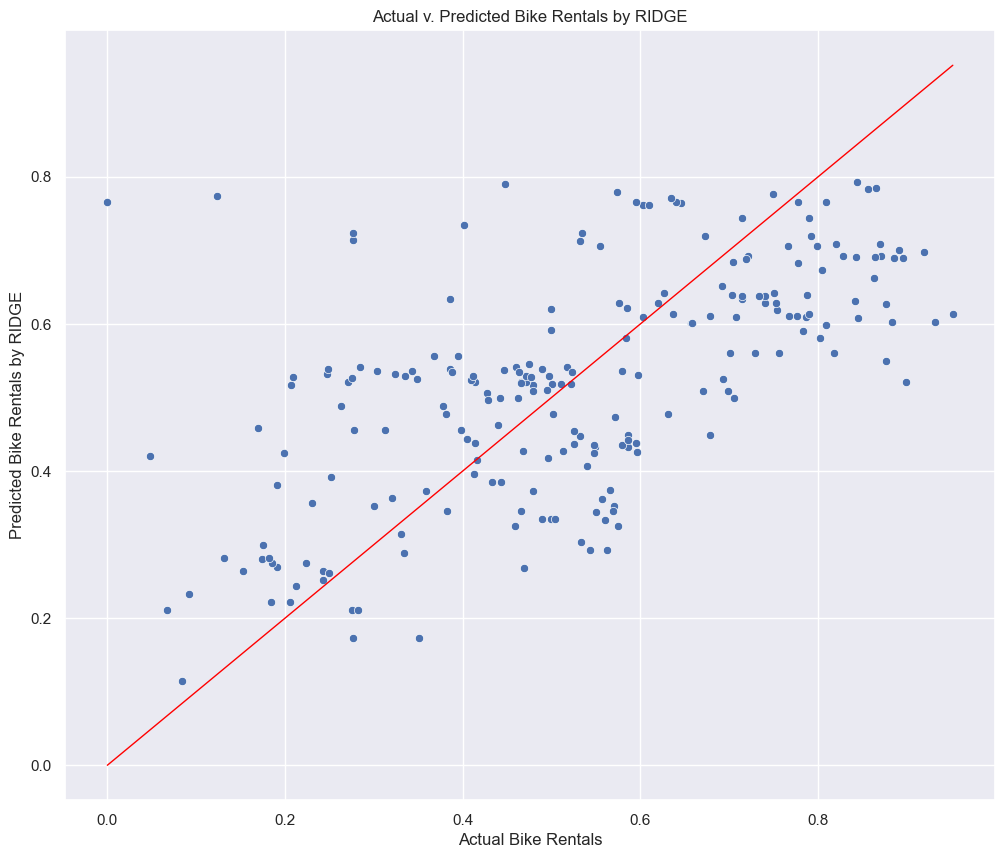

In [42]:
y_test = y_test.ravel()
h2_y_pred_ridge = h2_y_pred_ridge.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h2_y_pred_ridge)
plt.title('Actual v. Predicted Bike Rentals by RIDGE')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by RIDGE')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()

In [43]:
# Mean Squared Error
h2_ridge_mse = mean_squared_error(y_test,h2_y_pred_ridge)
print('Mean Squared Error:', h2_ridge_mse)

Mean Squared Error: 0.029217133648385157


In [44]:
h2_ridge_r2_score = h2_ridge.score(h2_X_test,y_test)
print("R-squared Score: ", h2_r2_score)

R-squared Score:  0.36693320824511255


**Model Comparision**

We can compare the performance of the Multiple Linear Regression and Ridge Regression models using R-squared evaluation metric. For multiple linear regression, the R-squared score is 0.36693 and the R-squared score of ridge regression is 0.36963.

Though both the models perform poorly on the dataset for this hypothesis, still we can see that Ridge Regression is performing a little bit better than the Multiple Linear Regression. We can use results from Ridge regression for comparing this hypothesis with other hypothesis.


This result could be acertained to the fact that there is corelation among the variables and ridge regression performs better when there are some trends in the attributes, and multiple lineear regression in that case doesn't perform as good as ridge regression.

## Hypothesis 3

**Including all the data (Seasonal, Holiday and Weather Conditions)**

Preparing data with the following columns for 3rd Hypothesis with the following columns:

- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit
- temp
- atemp
- hum
- windspeed

Creating dataset with the required attributes for this hypothesis:

In [45]:
h3_X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
print(h3_X.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  
0  0.363625  0.805833   0.160446  
1  0.353739  0.696087   0.248539  
2  0.189405  0.437273   0.248309  
3  0.212122  0.590435   0.160296  
4  0.229270  0.436957   0.186900  


Normalizing the data using Min-Max Scalar

In [46]:
h3_x = h3_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
h3_x_scaled = min_max_scaler.fit_transform(h3_x)
h3_X = pd.DataFrame(h3_x_scaled)

Train Test Splitting

In [47]:
# Splitting the dataset into train(70%) and test(30%) 
h3_X_train, h3_X_test, y_train, y_test = train_test_split(h3_X,y,test_size=0.3,
                                                    random_state=77)

### Model Training and Evaluation

#### Multiple Linear Regression

In [48]:
# Create a Linear Regression object
h3_lr = LinearRegression()

In [49]:
# Fit the model on training data
h3_lr.fit(h3_X_train,y_train)

LinearRegression()

Predicted values are  [[0.55675384]
 [0.39815695]
 [0.54673349]
 [0.3591595 ]
 [0.23927463]]
y_test              0
280  0.619765
403  0.319834
701  0.532329
345  0.378279
94   0.203981


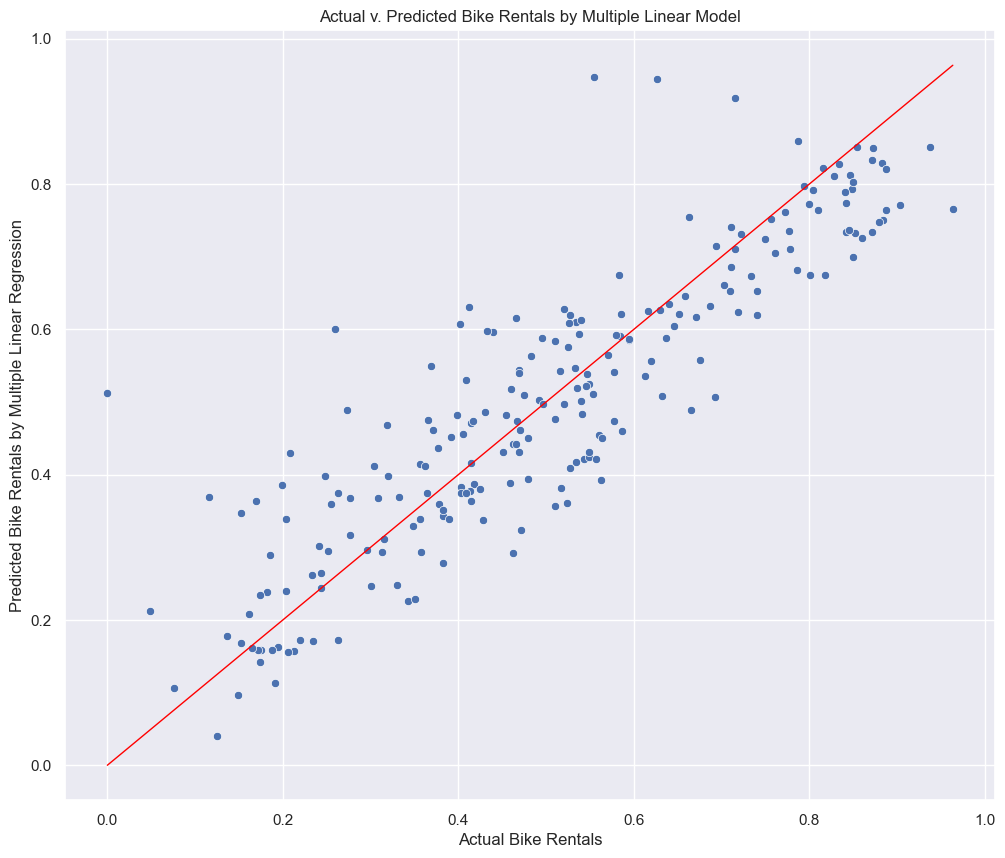

In [50]:
# Predicting target variable on testing data
h3_y_pred = h3_lr.predict(h3_X_test)

print('Predicted values are ', h3_y_pred[0:5])    # First Five Values of Predicted values
print('y_test ', y_test[0:5])

y_test = y_test.values.ravel()
h3_y_pred = h3_y_pred.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h3_y_pred)
plt.title('Actual v. Predicted Bike Rentals by Multiple Linear Model')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by Multiple Linear Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()


In [51]:
h3_mlr_mse = mean_squared_error(y_test, h3_y_pred)

print("Mean Squared Error: ", h3_mlr_mse)

Mean Squared Error:  0.010791117442201506


In [52]:
h3_mlr_r2_score = h3_lr.score(h3_X_test,y_test)

print("R-squared Score: ", h3_mlr_r2_score)

R-squared Score:  0.7744399713793073


#### Ridge

In [53]:
from sklearn.linear_model import Ridge

# create a ridge regression instance
h3_ridge = Ridge(alpha=1)

# fit data
h3_ridge.fit(h3_X_train,y_train)

# get predictions
h3_y_pred_ridge=h3_ridge.predict(h3_X_test)

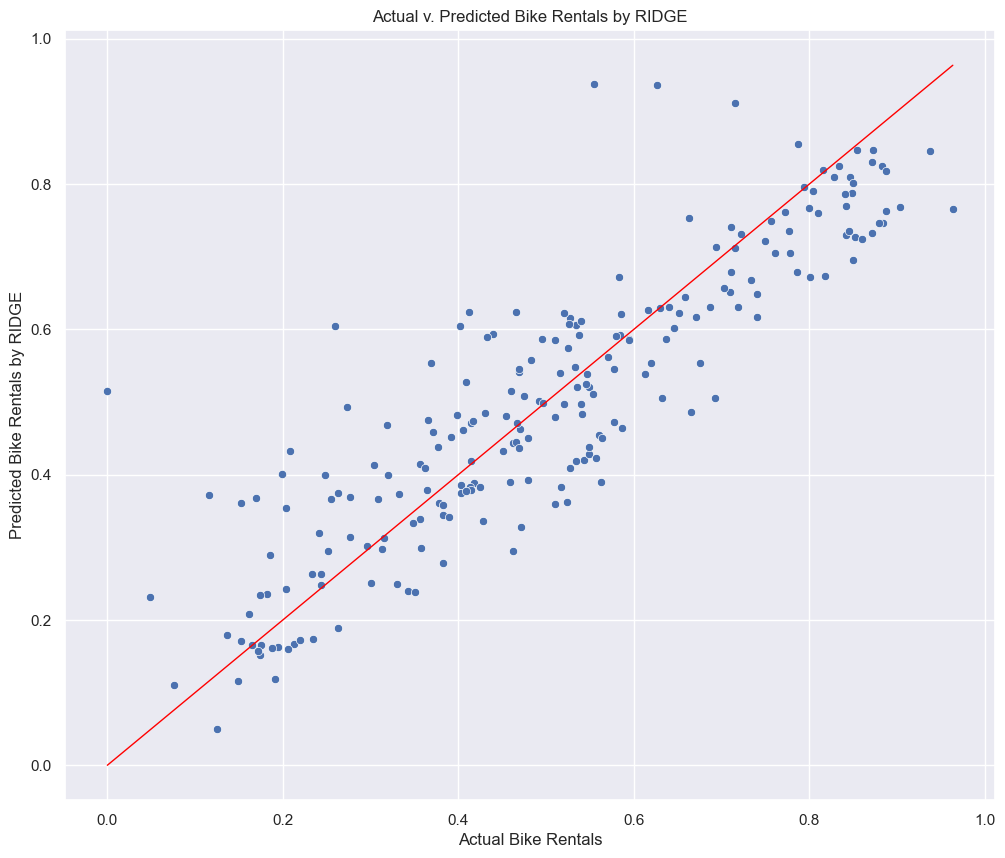

In [54]:
y_test = y_test.ravel()
h3_y_pred_ridge = h3_y_pred_ridge.ravel()

plt.figure(figsize=(12, 10))
sns.scatterplot(x=y_test, y=h3_y_pred_ridge)
plt.title('Actual v. Predicted Bike Rentals by RIDGE')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals by RIDGE')
plt.plot([0, max(y_test)], [0, max(y_test)], c='red', ls='-', lw=1)
plt.show()

In [55]:
# Mean Squared Error
h3_mse = mean_squared_error(y_test,h3_y_pred_ridge)
print('Mean Squared Error:', h3_mse)

Mean Squared Error: 0.01083597518052026


In [56]:
# R-squared Score
h3_r2_score = h3_ridge.score(h3_X_test,y_test)
print("R-squared Score: ", h3_r2_score)

R-squared Score:  0.7735023379235294


**Model Comparision**

We can compare the performance of the Multiple Linear Regression and Ridge Regression models using R-squared evaluation metric. For multiple linear regression, the R-squared score is 0.77443 and the R-squared score of ridge regression is 0.77350.

Both the models are performing satisfactorily on the dataset for this hypothesis and we can see that Multiple Linear Regression is performing a little bit better than Ridge Regression. We can use results from Multiple Linear regression for comparing this hypothesis with other hypothesis.


Multiple Linear regression is generally used when we are including all the parameters during the model training. Here, we are including all the parameters in our model, so that would explain why Multiple Linear Regression performed better than Ridge Regression.

## Results and Interpretation

In [57]:
eval_metrics = {
    'Mean Square Error' : [h1_ridge_mse, h2_ridge_mse, h3_mlr_mse],
    'R2 Score' : [h1_ridge_r2_score, h2_ridge_r2_score, h3_mlr_r2_score]
}

metrics = pd.DataFrame(eval_metrics, index = ['Hypothesis 1', 'Hypothesis 2', 'Hypothesis 3'])

print('The evaluation metrics is: \n', metrics)

The evaluation metrics is: 
               Mean Square Error  R2 Score
Hypothesis 1           0.009792  0.814070
Hypothesis 2           0.029217  0.369634
Hypothesis 3           0.010791  0.774440


Comparing the results from the models of all the 3 hypotheses, we can see that with a R2 Score of 0.814, Hypothesis 1 (the hypothesis where we included only the weather data and excluded holiday and weekend data) is the best among others.

Hypothesis 3, where we used all the features from our dataset, with a R2 score of 0.774, is not very far behind the hypothesis 1 when we compare the performance on R2 Score metric.

Finally, Hypothesis 2 performed the worst, and a R2 score of just 0.369 indicates that there is not a lot of relation between the count of bikes rented and whether it was a working day or a holiday.

### Statistical Inference

In [58]:
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed']
for var in continuous_vars:
    correlation, p_value = pearsonr(df[var], df['cnt'])
    print(f"Pearson correlation between {var} and count:")
    print(f"Correlation coefficient: {correlation}, p-value: {p_value}")

Pearson correlation between temp and count:
Correlation coefficient: 0.627494009033492, p-value: 2.810622397589998e-81
Pearson correlation between atemp and count:
Correlation coefficient: 0.6310656998491813, p-value: 1.8545041252836793e-82
Pearson correlation between hum and count:
Correlation coefficient: -0.10065856213715527, p-value: 0.006454143325437117
Pearson correlation between windspeed and count:
Correlation coefficient: -0.23454499742167, p-value: 1.3599586778865216e-10


The correlation coefficients above indicate the strength and direction of the linear relationship between each weather variable and rental counts:

- Temperature (temp): A moderate positive correlation (0.627) suggests a tendency for rental counts to increase with higher temperatures.
- Actual Temperature (atemp): Similarly, a moderate positive correlation (0.631) suggests a tendency for rental counts to increase with higher temperatures.
- Humidity (hum): A weak negative correlation (-0.100) suggests a slight tendency for rental counts to decrease marginally as humidity increases (though the correlation is quite weak).
- Windspeed: A weak negative correlation (-0.234) indicates a slight tendency for rental counts to decrease slightly as windspeed increases.

### Interpretation

- With the results published, it can be interpreted that the number of bike rentals is mainly dependent upon the weather conditions. This means that factors such as temperature of the day recorded, actual "feels like" temperature, windspeed, weather situation and humidity directly impact on people's choice of renting a bike or not. Higher temperature, humidity and windspeed might prompt people to choose to rent a bike. Also, on a sunny day also people could prefer to bike to their destination instead of walking. Another interpretation is that on a rainy day, people could be using other means of transport such as bus, car or train to travel and rainy days would see a drop in rentals.

- Hypothesis 2 was purly based on the idea that people could be using bikes for either commuting to work or for other tasks more than other, i.e., either there would be more rentals on a working day and less on a holiday or weekend, or, there would be less bike rentals observed on a working day and more on a holiday. But as the model showed, this hypothesis turned out to be wrong and people might be using bike rentals equaly for all types of commute.

- Interestingly, hypothesis 3 was not the best performing one as expected before. The notion was that training the model on all the data would result in better learning of user behaviour. But it turns out that including the data for workingday/holiday and weekday only made the model perform worse. This could be attributed to the fact that there is not really any correlation between these parameters and the count variable. Also, it has to be assumed that holidays and weekends do not depend on weather conditions.

## Conclusion

To conclude our findings, we have to start with our objectives and goal. We have achieved all our objectives of designing hypotheses and builiding models based on those hypotheses to perform regression analysis on the bike rental data.

Also, we were able to achieve our goal of predicting number of bike rentals with 81 percent R2 score using the weather data.

So, we compared 3 different hypotheses with different combination data, and for each hypothesis we built 2 regression models on it. The models used are Multiple Linear Regression and Ridge Regression because of their various advantages that fit for this type of dataset.

In most cases, Ridge Regression performed the best, and this can be contributed to the fact that there are some complex relationships within the dependent variables and Ridge Regression specifically works the best with datasets where there are trends within the dependent variables. So, we can conclude that Ridge Regression was the best model for out analysis among the 2 models we tested.

The different hypotheses were designed based on the correlation heatmap published during the EDA. The variables that have a greater impact on the count variable and also were correlated among themselves were considered together to form a hypothesis.

Now talking about the best hypothesis, with 81 percent R2 score, our 1st hypothesis worked the best for the regression analysis. The hypothesis was based on the intuition that number of bike rentals depend upon various weather condition given the seasonal impact. The various weather condition taken into consideration are temperature, weather situation, actual temperature, humidity and windspeed.

It was also noticed that the hypothesis 2 where we considered holiday/workingday, weekday and weekend dataa performed the worst among all the hyothesis. This could be attributed to the fact that there are no significant trends between these dependent variables and the independent variable cnt. This also reflects an user behaviour that people use the bikes on a working day and on a holiday in almost equal number.

After studying the statistical inferences of hypothesis 1, a few interesting trends were highlighted:

- With an increase in temperature and actual temperature, more peopl prefer to use bike instead of using other means of transport, most likely, people would rent a bike instead of walking as the temperature rises.

- Another noticable trend is that ore people prefer to ride a bike when it's less windy rather than using when wind speed is high.

- Additionally, humidity also plays a role in people deciding if they would rent a bike or not. As humidity rises, people prefer to use other means of transport rather than riding a bike.

Furthermore, there is a scope of improvement in the project. First of all, a larger dataset would drastically improve the performance of the model. Having just about 720 days of data, the model had to be trained on a quite small dataset which leaves a scope of model learning the best trends within the data. And also, after further data is procured, another comparision within 1st and 3rd hypothesis can be done as they are not very far when it comes to R2 score and more data could result in some more interesting trends making not only the model, but also the hypothsis perform better.

## Reference

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
- https://seaborn.pydata.org/
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://analystprep.com/cfa-level-1-exam/quantitative-methods/hypothesis-testing-in-regression-analysis/